이 절에서 공부할 베타분포, 감마분포, 디리클레 분포는 
##### 모수값을 조정하여 분포의 모양을 우리가 원하는대로 쉽게 바꿀 수 있다. 

모수값은 분포 모양을 조절하는 조절값이라고 생각하면 된다. 이러한 특성때문에 이 분포들은 데이터가 이루는 분포를 표현하기보다는 
##### 베이지안 확률론의 관점에서 어떤 값에 대해 우리가 가지고 있는 확신 혹은 신뢰의 정도를 표현하는데 주로 사용된다.

## 베타분포

베타분포는  𝑎 와  𝑏 라는 두 모수를 가지며 표본 공간은 0과 1사이의 실수다. 즉 0와 1사이의 표본값만 가질 수 있다.



$$\text{Beta}(x;a,b), \;\; 0 \leq x \leq 1$$

베타분포의 확률밀도함수는 다음과 같다.

\begin{align}
\text{Beta}(x;a,b) 
& = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\, x^{a-1}(1-x)^{b-1} 
\end{align}

이 식에서  Γ(𝑎) 는 감마함수(Gamma function)라는 특수함수로 다음처럼 정의된다.

$$\Gamma(a) = \int_0^\infty  x^{a-1} e^{-x}\, dx$$

여러 모수  𝑎,𝑏 값에 대해 베타분포의 모양을 그려보면 다음과 같다.

In [9]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=12).get_name()

plt.rc('font', family=font_name)

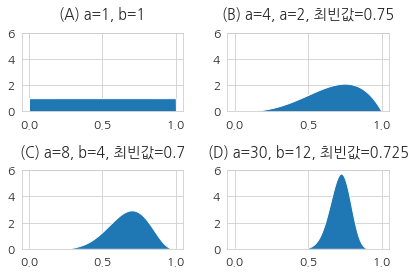

In [10]:
import scipy as sp
import scipy.stats

xx = np.linspace(0, 1, 1000)
plt.subplot(221)
plt.fill_between(xx, sp.stats.beta(1.0001, 1.0001).pdf(xx))  # a=1.0001, b=1.0001
plt.ylim(0, 6)
plt.title("(A) a=1, b=1", y=1.1)
plt.subplot(222)
plt.fill_between(xx, sp.stats.beta(4, 2).pdf(xx))
plt.ylim(0, 6)
plt.title("(B) a=4, a=2, 최빈값={}".format((4-1)/(4+2-2)), y=1.1)  # mode = (a-1) / (a + b - 2)
plt.subplot(223)
plt.fill_between(xx, sp.stats.beta(8, 4).pdf(xx))
plt.ylim(0, 6)
plt.title("(C) a=8, b=4, 최빈값={}".format((8-1)/(8+4-2)), y=1.1)
plt.subplot(224)
plt.fill_between(xx, sp.stats.beta(30, 12).pdf(xx))
plt.ylim(0, 6)
plt.title("(D) a=30, b=12, 최빈값={}".format((30-1)/(30+12-2)), y=1.1)

plt.tight_layout()
plt.show()

이 그림으로부터 모수  𝑎,𝑏 가 베타분포의 모양을 결정하는 형상 인자(shape factor)라는 것을 알 수 있다. 베타분포의 기댓값, 최빈값, 분산은 각각 다음과 같다.

+ 기댓값

$$E[x] = \dfrac{a}{a+b}$$

+ 최빈값 : 확률분포가 가장 커지는 위치

$$\text{mode} = \dfrac{a - 1}{a+b - 2}$$

+ 분산 : 확률분포의 폭

$$\text{Var}[x] = \dfrac{ab}{(a+b)^2(a+b+1)}$$

최빈값 수식을 보면  𝑎=𝑏 일 때  𝑥=0.5 에서 가장 확률밀도가 커지는 것을 알 수 있다. 

또한 분산 수식에서 분모가 3차식, 분자가 2차식이기 때문에  
##### 𝑎,𝑏 의 값이 커질수록 분산 즉, 확률분포의 폭이 작아진다.

베타분포(Beta distribution)는 다른 확률 분포와 달리 자연계에 존재하는 데이터의 분포를 묘사하는 것뿐 아니라 

##### 다른 확률분포함수의 모수를 베이지안 추정(Bayesian estimation)한 결과를 표현하는 데 사용된다. 
##### 베이지안 추정은 모수가 가질 수 있는 모든 값에 대해 가능성을 확률분포로 나타낸 것을 말한다.

베타분포는 0부터 1까지의 값을 가질 수 있는 베르누이분포의 모수  𝜇 의 값을 추정한 결과를 표현한 것이다. 실제로 베르누이분포의 모수를 베이지안 추정하는 것은 나중에 다루게 된다. 여기에서는 결과만 보였다.

위 그림이 베이지안 추정 결과라면 각각은 베르누이분포의 모수  𝜇 에 대해 다음과 같이 추정한 것과 같다.

+ (A): 베르누이분포의 모수  𝜇 를 추정할 수 없다. (정보가 없음)
+ (B): 베르누이분포의 모수  𝜇 값이 0.75일 가능성이 가장 크다. (정확도 낮음)
+ (C): 베르누이분포의 모수  𝜇 값이 0.70일 가능성이 가장 크다. (정확도 중간)
+ (D): 베르누이분포의 모수  𝜇 이 0.725일 가능성이 가장 크다. (정확도 높음)


## 감마분포

감마분포(Gamma distribution)도 베타분포(Beta distribution)처럼 모수의 베이지안 추정에 사용된다. 다만 베타분포가 0부터 1 사잇값을 가지는 모수를 베이지안 방법으로 추정하는 데 사용되는 것과 달리 

##### 감마분포는 0부터 무한대의 값을 가지는 양수 값을 추정하는 데 사용된다.

감마분포의 확률 밀도 함수는 a와 b라는 두 모수(parameter)를 가지며 수학적으로 다음과 같이 정의된다.

$$\text{Gam}(x;a,b) = \frac{1}{\Gamma(a)} b^a x^{a-1}e^{-bx}$$

감마분포의 확률 밀도 함수는 모수  𝑎 ,  𝑏 의 값에 따라 다음과 같은 형상을 가진다.

##### 사이파이의 stats 서브패키지에서 제공하는 gamma 클래스는 모수  𝑏=1 로 고정되어  𝑎  값만 설정할 수 있다.  

𝑏 를 바꾸려면  𝑥 값 스케일과 계수를 수동으로 설정하여야 한다.

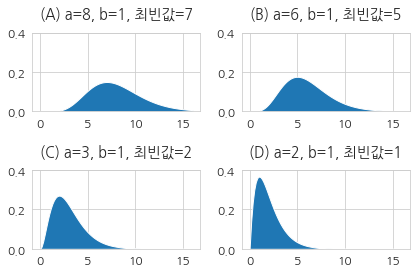

In [43]:
xx = np.linspace(0, 16, 100)
plt.subplot(221)
plt.fill_between(xx, sp.stats.gamma(8).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(A) a=8, b=1, 최빈값=7", y=1.1)  
plt.subplot(222)
plt.fill_between(xx, sp.stats.gamma(6).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(B) a=6, b=1, 최빈값=5", y=1.1)
plt.subplot(223)
plt.fill_between(xx, sp.stats.gamma(3).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(C) a=3, b=1, 최빈값=2", y=1.1)
plt.subplot(224)
plt.fill_between(xx, sp.stats.gamma(2).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(D) a=2, b=1, 최빈값=1", y=1.1)
plt.tight_layout()
plt.show()


위 그림이 베이지안 추정 결과라면 각각은 모수에 대해 다음과 같이 추정한 것과 같다.

+ (A): 추정하고자 하는 모수값이 7일 가능성이 가장 크다. (정확도 아주 낮음)
+ (B): 추정하고자 하는 모수값이 5일 가능성이 가장 크다. (정확도 낮음)
+ (C): 추정하고자 하는 모수값이 2일 가능성이 가장 크다. (정확도 높음)
+ (D): 추정하고자 하는 모수값이 1일 가능성이 가장 크다. (정확도 아주 높음)

감마분포의 기댓값, 최빈값, 분산은 각각 다음과 같다.

+ 기댓값

$$\text{E}[X] = \dfrac{a}{b}$$

+ 최빈값

$$\text{mode} = \dfrac{a-1}{b}$$

+ 분산

$$\text{Var}[X] = \dfrac{a}{b^2}$$

## 디리클레분포

디리클레분포(Dirichlet distribution)는 베타분포의 확장판이라고 할 수 있다. 

##### 베타분포는 0과 1사이의 값을 가지는 단일(univariate) 확률변수의 베이지안 모형에 사용되고 
##### 디리클레분포는 0과 1사이의 사이의 값을 가지는 다변수(multivariate) 확률변수의 베이지안 모형에 사용된다.

예를 들어  𝐾=3 인 디리클레분포를 따르는 확률변수는 다음과 같은 값들을 표본으로 가질 수 있다.

$$(0.2, 0.3, 0.5)$$
$$(0.5, 0.5, 0)$$
$$(1, 0, 0)$$

디리클레분포의 확률밀도함수는 다음과 같다.

$$\text{Dir}(x;\alpha) = \text{Dir}(x_1, x_2, \cdots, x_K; \alpha_1, \alpha_2, \cdots, \alpha_K) 
= 
\frac{1}{\mathrm{B}(\alpha_1, \alpha_2, \cdots, \alpha_K)} \prod_{i=1}^K x_i^{\alpha_i - 1}$$

이 식에서  𝑥=(𝑥1,𝑥2,…,𝑥𝐾) 는 디리클레분포의 표본값 벡터이고  𝛼=(𝛼1,𝛼2,…,𝛼𝐾) 는 모수 벡터다.  

B(𝛼1,𝛼2,⋯,𝛼𝐾) 는 베타함수라는 특수함수로 다음처럼 정의한다.

$$\mathrm{B}(\alpha_1, \alpha_2, \cdots, \alpha_K) = \frac{\prod_{i=1}^K \Gamma(\alpha_i)} {\Gamma\bigl(\sum_{i=1}^K \alpha_i\bigr)}$$

디리클레분포의 확률값  𝑥 는 다음 제한조건을 따른다.

$$0 \leq x_i \leq 1, \;\;\; \sum_{i=1}^{K} x_i = 1$$

### 베타분포와 디리클레분포의 관계

베타분포는  𝐾=2 인 디리클레분포라고 볼 수 있다.

즉  𝑥1=𝑥 ,  𝑥2=1−𝑥 ,  𝛼1=𝑎 ,  𝛼2=𝑏  로 하면

\begin{eqnarray}
\text{Beta}(x;a,b) 
&=& \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\, x^{a-1}(1-x)^{b-1} \\
&=& \frac{\Gamma(\alpha_1+\alpha_2)}{\Gamma(\alpha_1)\Gamma(\alpha_2)}\,  x_1^{\alpha_1 - 1} x_2^{\alpha_2 - 1} \\
&=& \frac{1}{\mathrm{B}(\alpha_1, \alpha_2)} \prod_{i=1}^2 x_i^{\alpha_i - 1}
\end{eqnarray}

### 디리클레분포의 모멘트

디리클레분포의 기댓값, 최빈값, 분산은 다음과 같다.

+ 기댓값

$$\text{E}[x_k] = \dfrac{\alpha_k}{\sum\alpha}$$

+ 최빈값

$$\text{mode} = \dfrac{\alpha_k - 1}{\sum\alpha - K}$$

+ 분산
$$\text{Var}[x_k] =\dfrac{\alpha_k(\sum\alpha - \alpha_k)}{(\sum\alpha)^2(\sum\alpha + 1)}$$

기댓값 공식을 보면 모수인  (𝛼1,𝛼2,…,𝛼𝐾) 는  (𝑥1,𝑥2,…,𝑥𝐾)  중 어느 수가 더 크게 나올 가능성이 높은지를 결정하는 형상 인자(shape factor)임을 알 수 있다. 

모든  𝛼𝑖 값이 동일하면 모든  𝑥𝑖 의 분포가 같아진다.

또한 분산 공식을 보면  (𝛼1,𝛼2,…,𝛼𝐾) 의 절대값이 클수록 분산이 작아진다. 

##### 즉, (𝛼1,𝛼2,…,𝛼𝐾) 의 절대값이 클수록 디리클리 분포의 표본값  𝑥 가 어떤 특정한 값 주변이 나올 가능성이 높아진다.

### 디리클레분포의 응용

다음과 같은 문제를 보자.

x, y, z가 양의 난수일 때 항상 x + y + z = 1이 되게 하려면 어떻게 해야될까요? 모든 경우가 균등하게 나와야 한다.

이 문제는  𝐾=3 이고  𝛼1=𝛼2=𝛼3  인 디리클레 분포의 특수한 경우이다.

𝐾=3 인 디리클레 문제는 다음 그림과 같이 3차원 공간 상에서 (1,0,0), (0,1,0), (0,0,1) 세 점을 연결하는 정삼각형 면위의 점을 생성하는 문제라고 볼 수 있다.



In [45]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

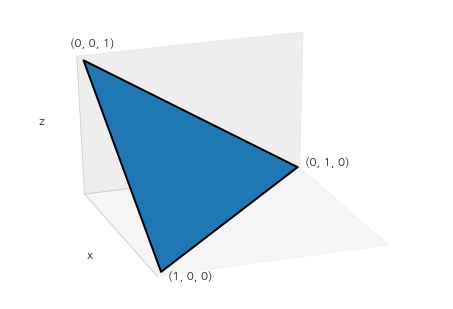

In [54]:
fig = plt.figure()
ax = Axes3D(fig)

x = [1, 0, 0]
y = [0, 1, 0]
z = [0, 0, 1]

verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, edgecolor='k', lw=2, alpha=0.4))
ax.text(1, 0, 0, "(1, 0, 0)", position=(1.1, 0))
ax.text(0, 1, 0, "(0, 1, 0)", position=(0, 1.04))
ax.text(0, 0, 1, "(0, 0, 1)", position=(-0.2, 0))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.view_init(30, -20)
tmp_planes = ax.zaxis._PLANES

# set origin
# http://stackoverflow.com/questions/15042129/changing-position-of-vertical-z-axis-of-3d-plot-matplotlib 참조


ax.yaxis._PLANES = (
    tmp_planes[2], tmp_planes[3],
    tmp_planes[0], tmp_planes[1],
    tmp_planes[4], tmp_planes[5],
)
ax.zaxis._PLANES = (
    tmp_planes[2], tmp_planes[3],
    tmp_planes[0], tmp_planes[1],
    tmp_planes[4], tmp_planes[5],
)

다음 함수는 생성된 점들을 2차원 삼각형 위에서 볼 수 있도록 그려주는 함수이다.

In [55]:
def plot_triangle(X, kind):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2) / 2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1 / np.linalg.norm(m1)
    m2 = m2 / np.linalg.norm(m2)
    
    X1 = (X - n12).dot(m1)
    X2 = (X - n12).dot(m2)
    
    sns.jointplot(X1, X2, kind=kind, xlim=(-0.8, 0.8), ylim=(-0.1, 1.25))
    plt.show()

만약 이 문제를 단순하게 생각하여 서로 독립인 0과 1사이의 유니폼 확률변수를 3개 생성하고 이들의 합이 1이 되도록 크기를 정규화(normalize)하면 다음 그림과 같이 삼각형의 중앙 근처에 많은 확률 분포가 집중된다. 즉, 확률변수가 골고루 분포되지 않는다.

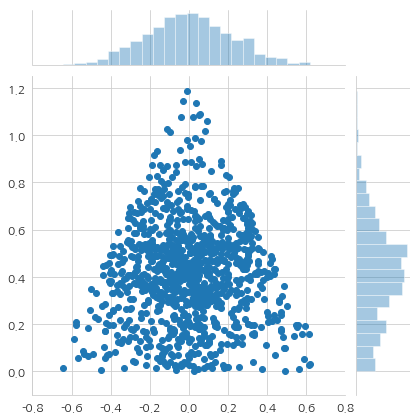

In [56]:
np.random.seed(0)
X1 = np.random.rand(1000, 3)
X1 = X1 / X1.sum(axis=1)[:, np.newaxis]
plot_triangle(X1, kind="scatter")

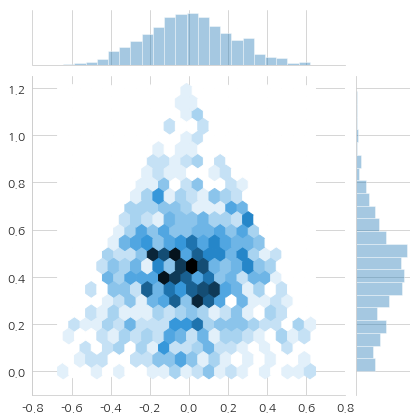

In [57]:
plot_triangle(X1, kind="hex")

그러나  𝛼=(1,1,1) 인 디리클레분포는 다음과 같이 골고루 샘플을 생성한다.

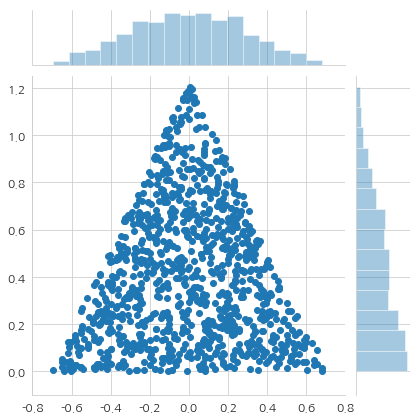

In [58]:
X2 = sp.stats.dirichlet((1, 1, 1)).rvs(1000)
plot_triangle(X2, kind="scatter")

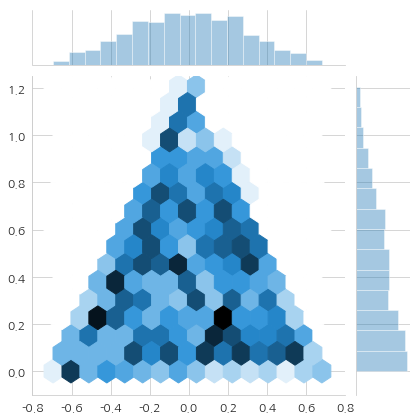

In [59]:
plot_triangle(X2, kind="hex")

## 베이지안 추정

𝛼 가  (1,1,1) 이 아닌 경우에는 다음과 같이 특정 위치에 분포가 집중되도록 할 수 있다. 이 특성을 이용하면 카테고리분포의 모수 벡터  𝜇 를 추정한 결과를 나타낼 수 있다.

In [61]:
def project(x):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2) / 2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1 / np.linalg.norm(m1)
    m2 = m2 / np.linalg.norm(m2)
    
    return np.dstack([(x - n12).dot(m1), (x-n12).dot(m2)])[0]

def project_reverse(x):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2) / 2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1 / np.linalg.norm(m1)
    m2 = m2 / np.linalg.norm(m2)
    
    return x[:, 0][:, np.newaxis] * m1 + x[:, 1][:, np.newaxis] * m2 + n12

eps = np.finfo(float).eps * 10
X = project([[1 - eps, 0, 0], [0, 1 - eps, 0], [0, 0, 1-eps]])

In [63]:
import matplotlib.tri as mtri
triang = mtri.Triangulation(X[:, 0], X[:, 1], [[0, 1, 2]])
refiner = mtri.UniformTriRefiner(triang)
triang2 = refiner.refine_triangulation(subdiv=6)
XYZ = project_reverse(np.dstack([triang2.x, triang2.y, 1 - triang2.x - triang2.y])[0])

다음 결과는 모수값을 추정하지 못한 경우이다.

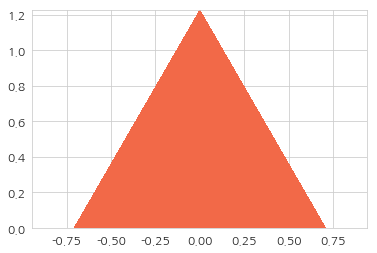

In [64]:
pdf = sp.stats.dirichlet([1, 1, 1]).pdf(XYZ.T)
plt.tricontourf(triang2, pdf)
plt.axis("equal")
plt.show()

다음 결과는 카테고리분포의 모수가  (0.3,0.5,0.2) 라고 추정한 것과 같다.

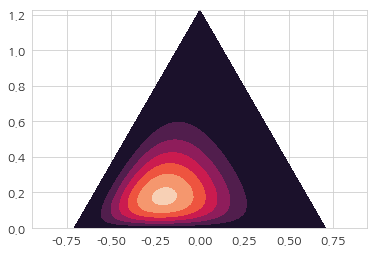

In [66]:
pdf = sp.stats.dirichlet((3, 5, 2)).pdf(XYZ.T)
plt.tricontourf(triang2, pdf)
plt.axis("equal")
plt.show()

다음 결과도 카테고리분포의 모수가  (0.3,0.5,0.2)  라고 추정한 것이지만 신뢰도가 훨씬 높은 결과이다.

In [ ]:
pdf = sp.stats.dirichlet((30, 50, 20)).